In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np

<div style="text-align: center; font-weight: bold; font-size: 35px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px; margin-bottom: 20px; padding: 10px 0; border-top: 2px solid #666; border-bottom: 2px solid #666;">
  Przygotowania danych normalnego ruchu do trenowania modelu – "Monday - normal traffic"
</div>

<div style="font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
<ol style="margin-left: 20px;">
    <li>Przygotowanie danych</li>
    <li>Usunięcie redundancj</li>
    <li>Reset indexu</li>
  </ol>
</div>


In [2]:
# Wczytanie danych
df = pd.read_csv("../datasets/CIC-IDS2017/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv", low_memory=False)
print("Lenght of dataframe befour preperation: ")
print(len(df))

df.columns = df.columns.str.strip()
print("Droping Lable and redundancy")
df = df.drop(["Fwd Header Length.1", "Label"], axis = 1)
print("Number of NANS")
print(df.isna().any(axis=1).sum())
#df.info()


#df = df.drop_duplicates()


num_cols = df.select_dtypes(include=[np.number]).columns
inf_mask = np.isinf(df[num_cols])
columns_with_inf = df.columns[inf_mask.any()]
print("Colums with inf: ")
print(columns_with_inf.tolist())

df.replace([np.inf, -np.inf], np.nan, inplace=True)

print("Number of NANS and infs: ")
print(df.isna().any(axis=1).sum())
df.dropna(inplace=True)
df = df.reset_index(drop=True)
print("Lenght of dataframe after preperation: ")
print(len(df))

Lenght of dataframe befour preperation: 
529918
Droping Lable and redundancy
Number of NANS
64
Colums with inf: 
['Flow Bytes/s', 'Flow Packets/s']
Number of NANS and infs: 
437
Lenght of dataframe after preperation: 
529481


<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>3. Skalowanie danych</div>
</div>

In [3]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns  
)

<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>3.5. Skalowanie danych - wizualizacja dzialania skalowania</div>
</div>

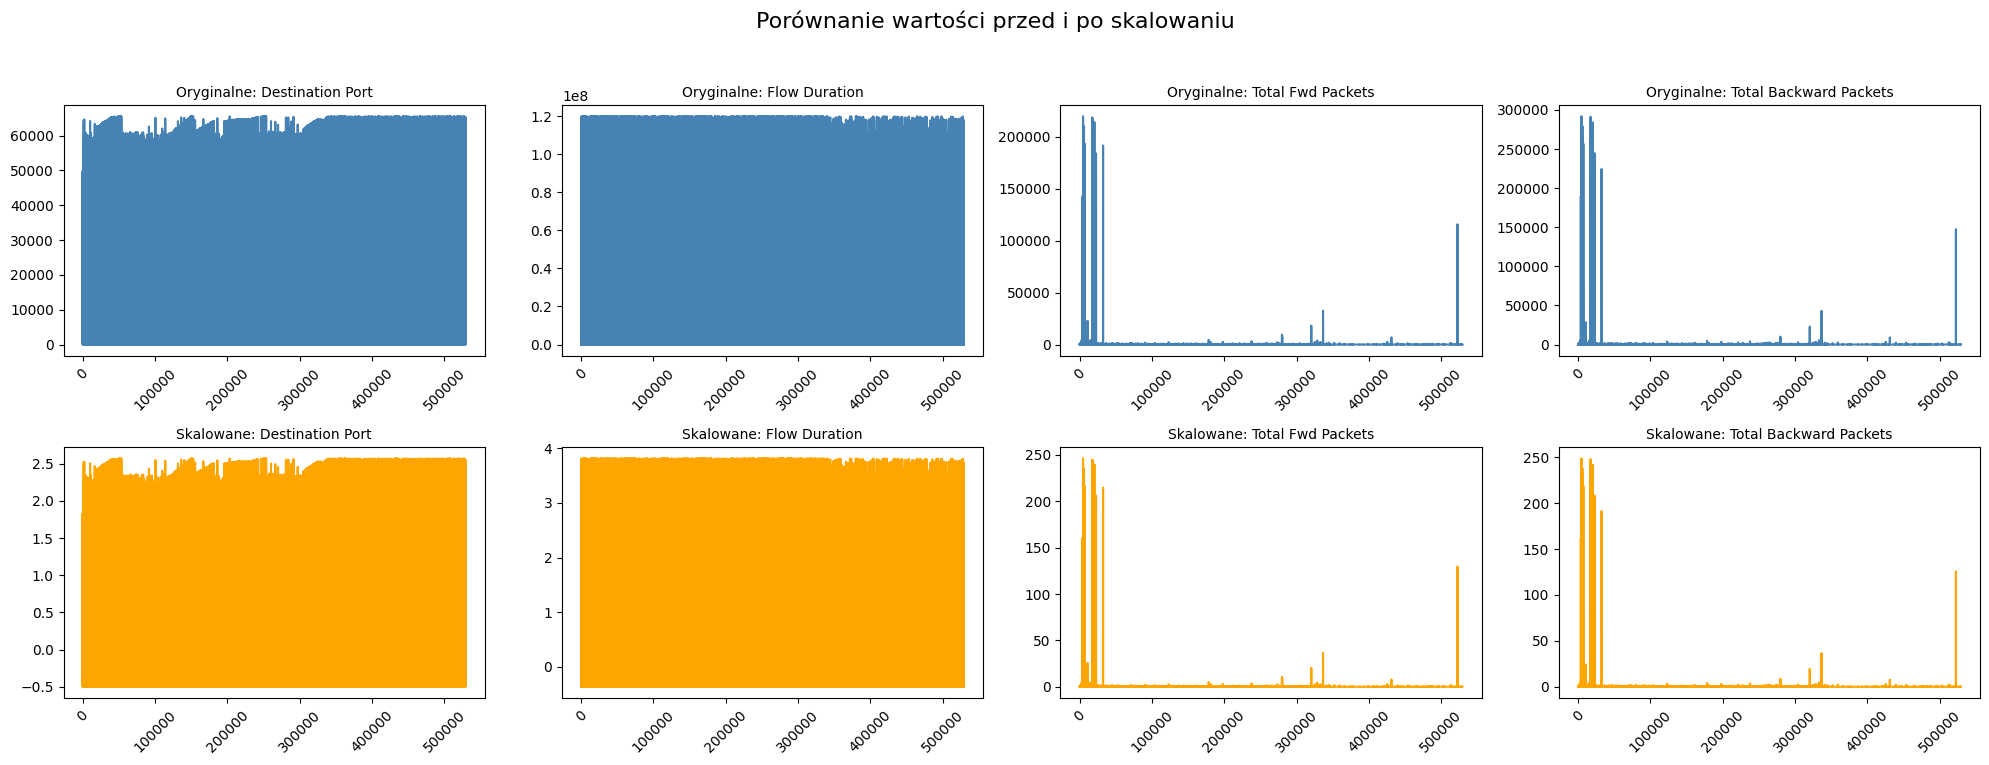

Series([], Name: Total Fwd Packets, dtype: float64)


In [4]:
columns_to_plot = df.columns[:4]

# Ustawienia siatki 2x4 (2 wiersze: oryginał, skalowane)
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
fig.suptitle("Porównanie wartości przed i po skalowaniu", fontsize=16)

for i, col in enumerate(columns_to_plot):
    # Oryginalne dane - wykres liniowy
    axes[0, i].plot(df[col].values, color='steelblue')
    axes[0, i].set_title(f"Oryginalne: {col}", fontsize=10)
    axes[0, i].tick_params(axis='x', rotation=45)

    # Skalowane dane - wykres liniowy
    axes[1, i].plot(df_scaled[col].values, color='orange')
    axes[1, i].set_title(f"Skalowane: {col}", fontsize=10)
    axes[1, i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print(df_scaled[df_scaled["Total Fwd Packets"] > 500]["Total Fwd Packets"])


<div style="text-align: center; font-weight: bold; font-size: 35px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px; margin-bottom: 20px; padding: 10px 0; border-top: 2px solid #666; border-bottom: 2px solid #666;">
  Przygotowanie dataframe'ów testowych zawierająch różne ataki
</div>

<div style="font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <li>1. Przygotowanie danych z Tuesday-WorkingHours.pcap_ISCX.csv</li>
    <ul style="margin-left: 15px;">
        <li>df_2 - dane "Tuesday-WorkingHours"</li>
        <li>df_2_5 - dane "Tuesday-WorkingHours" tylko z brut forcem</li>
    </ul>
</div>

In [5]:
# Wczytanie danych
df_2 = pd.read_csv("../datasets/CIC-IDS2017/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv", low_memory=False)

df_2.columns = df_2.columns.str.strip()
df_2 = df_2.drop(["Fwd Header Length.1"], axis = 1)


#df_2 = df_2.drop_duplicates()


len_1 = len(df_2)
nans = df_2.isna().any(axis=1).sum()
print("Number of flows: " , len(df_2))
print("Number of flows labled FTP - Patator: ", df_2['Label'].str.contains('FTP-Patator', na=False).sum())
print("Number of flows with NAN: " , nans)

df_2.replace([np.inf, -np.inf], np.nan, inplace=True)
infs = df_2.isna().any(axis=1).sum() - nans
print("Number of flows with inf or -inf : " , infs)

df_2.dropna(inplace=True)
print("Number of flows labled FTP - Patator after deleting NANs and INFs: ", df_2['Label'].str.contains('FTP-Patator', na=False).sum())
len_2 = len_1 - len(df_2)
print(len_2, "Flows deleted ,","flows in Tuesday-WorkingHours after preparation : ", len(df_2) )
print("\nCreating df_2_5 with everything that is labled having FTP brut force")


df_2_5 = df_2[df_2['Label'].str.contains('FTP-Patator', na=False)]
df_2_5 = df_2_5.drop(["Label"], axis = 1)
df_2_5 = df_2_5.reset_index(drop=True)
print("number of flows in final df_2_5 test dataframe : ", len(df_2_5))

df_2_labels = df_2["Label"]
df_2 = df_2.drop(["Label"], axis = 1)
df_2_labels = df_2_labels.reset_index(drop=True)
df_2 = df_2.reset_index(drop=True)

Number of flows:  445909
Number of flows labled FTP - Patator:  7938
Number of flows with NAN:  201
Number of flows with inf or -inf :  63
Number of flows labled FTP - Patator after deleting NANs and INFs:  7935
264 Flows deleted , flows in Tuesday-WorkingHours after preparation :  445645

Creating df_2_5 with everything that is labled having FTP brut force
number of flows in final df_2_5 test dataframe :  7935


<div style="font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <li>2. Przygotowanie danych z Wednesday-WorkingHours.pcap_ISCX.csv</li>
    <ul style="margin-left: 15px;">
        <li>df_3 - dane "Wednesday-WorkingHours"</li>
        <li>df_3_5 - dane "Wednesday-WorkingHours" tylko z różnymi atakami</li>
    </ul>
</div>

In [6]:
df_3 = pd.read_csv("../datasets/CIC-IDS2017/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv", low_memory=False)

df_3.columns = df_3.columns.str.strip()
df_3 = df_3.drop(["Fwd Header Length.1"], axis = 1)


#df_3 = df_3.drop_duplicates()


len_1 = len(df_3)
nans = df_3.isna().any(axis=1).sum()
print("Number of flows: " , len(df_3))
print("Number of flows labled as Attac: ", (~df_3['Label'].str.contains('BENIGN', na=False)).sum())
print("Number of flows with NAN: " , nans)

df_3.replace([np.inf, -np.inf], np.nan, inplace=True)
infs = df_3.isna().any(axis=1).sum() - nans
print("Number of flows with inf or -inf : " , infs)

df_3.dropna(inplace=True)
print("Number of flows labled as Attac after deleting NANs and INFs: ", (~df_3['Label'].str.contains('BENIGN', na=False)).sum())
len_2 = len_1 - len(df_3)
print(len_2, "Flows deleted, flows in Wednesday-WorkingHours after preparation : ", len(df_3) )
print("\nCreating df_3_5 with everything that is labled having an Attac")


df_3_5 = df_3[~df_3['Label'].str.contains('BENIGN', na=False)]
df_3_5 = df_3_5.drop(["Label"], axis = 1)
df_3_5 = df_3_5.reset_index(drop=True)
print("number of flows in final df_3_5 test dataframe : ", len(df_3_5))

df_3_labels = df_3["Label"]
df_3 = df_3.drop(["Label"], axis = 1)
df_3_labels = df_3_labels.reset_index(drop=True)
df_3 = df_3.reset_index(drop=True)


Number of flows:  692703
Number of flows labled as Attac:  252672
Number of flows with NAN:  1008
Number of flows with inf or -inf :  289
Number of flows labled as Attac after deleting NANs and INFs:  251723
1297 Flows deleted, flows in Wednesday-WorkingHours after preparation :  691406

Creating df_3_5 with everything that is labled having an Attac
number of flows in final df_3_5 test dataframe :  251723


<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>4. Skalowanie danych:</div>

</div>

In [7]:

df_2_scaled = pd.DataFrame(
    scaler.transform(df_2),
    columns=df_2.columns  
)


df_2_5_scaled = pd.DataFrame(
    scaler.transform(df_2_5),
    columns=df_2_5.columns  
)

df_3_scaled = pd.DataFrame(
    scaler.transform(df_3),
    columns=df_3.columns  
)


df_3_5_scaled = pd.DataFrame(
    scaler.transform(df_3_5),
    columns=df_3_5.columns  
)

print(df_3_scaled.isna().any(axis=1).sum())

0


<div style="text-align: center; font-weight: bold; font-size: 35px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px; margin-bottom: 20px; padding: 10px 0; border-top: 2px solid #666; border-bottom: 2px solid #666;">
  Isolation forest - algorytm  wykrywania anomali
</div>

<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>1. Trenowanie na normalnym ruchu</div>
</div>

In [8]:
IF = IsolationForest(
    n_estimators=200,
    max_samples=512, 
    contamination= 0.01, #PRAKTYCZNIE NIE ISTOTNE DO PRZEWIDYWAN MODELU, ISTOTNE TYLKO PRZY ZWRACANIU WYNIKOW ZE STATYSTYK
    max_features=1.0, 
    bootstrap=False, 
    n_jobs=None, 
    random_state=33, 
    verbose=1, 
    warm_start=False
)


IF.fit(df_scaled)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.4s finished


,n_estimators,200
,max_samples,512
,contamination,0.01
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,33
,verbose,1
,warm_start,False


<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>2.1 Wizualizacja efektu testu na danych Tuesday-workingHours - FTP-patator only</div>
</div>

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished



 Detection distribution anomaly/normal: 0.0000% / 100.0000%
!!! Wyniki pokazuje dopasowanie contamination (wyciagancia wnioskow z gotowego produktu pracy modelu) NIE DCHYLENIA NORMALNY/ANOMALYJNY ruch sieciowy !!!
Anomaly detected:  0
Normal traffic:  7935


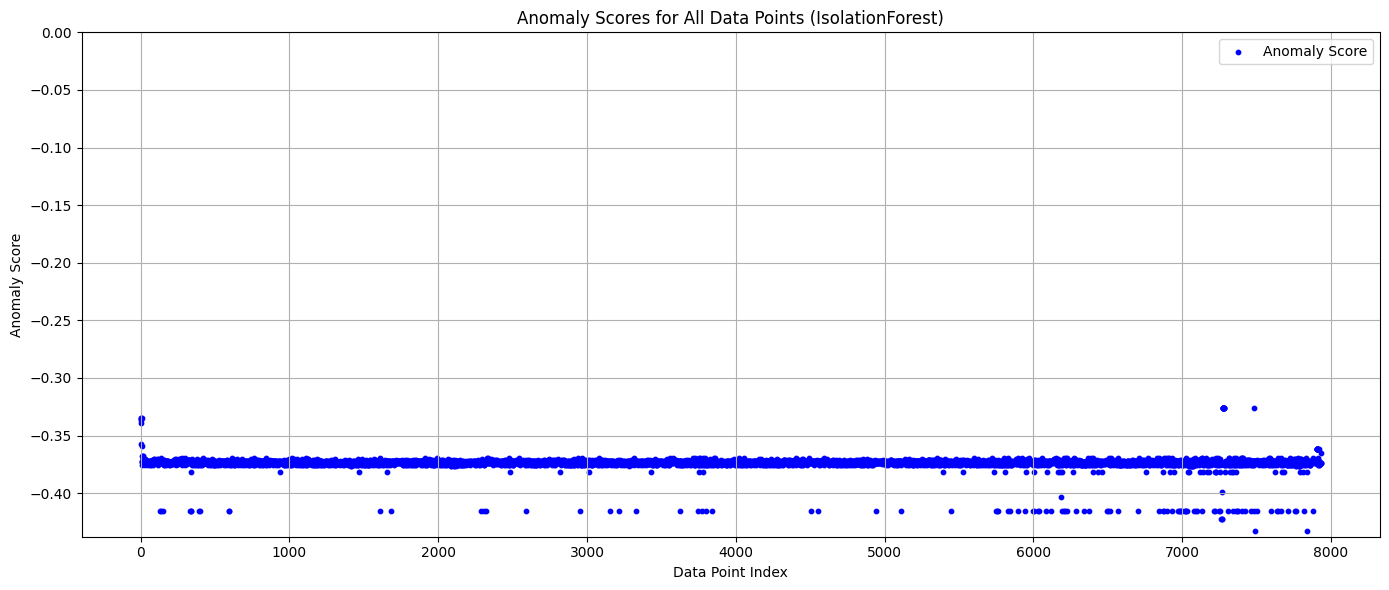

In [9]:
preds_2_5 = IF.predict(df_2_5_scaled)
scores_2_5 = IF.score_samples(df_2_5_scaled)

df_2_5_scaled_result = pd.DataFrame()
df_2_5_scaled_result['prediction'] = preds_2_5
df_2_5_scaled_result['anomaly_score'] = scores_2_5


anomaly_2_5 = (df_2_5_scaled_result["prediction"] == -1).sum()
normal_2_5 = (df_2_5_scaled_result["prediction"] == 1).sum()

print("\n" , f"Detection distribution anomaly/normal: {anomaly_2_5 / len(df_2_5_scaled_result) * 100:.4f}% / {normal_2_5 / len(df_2_5_scaled_result) * 100:.4f}%")
print("!!! Wyniki pokazuje dopasowanie contamination (wyciagancia wnioskow z gotowego produktu pracy modelu) NIE DCHYLENIA NORMALNY/ANOMALYJNY ruch sieciowy !!!")
print("Anomaly detected: ",anomaly_2_5)
print("Normal traffic: ",normal_2_5)
plt.figure(figsize=(14, 6))

plt.scatter(df_2_5_scaled_result.index, df_2_5_scaled_result['anomaly_score'], color='blue', label='Anomaly Score', s=10)

plt.title('Anomaly Scores for All Data Points (IsolationForest)')
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(top=0)
plt.show()


<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>2.2 Wizualizacja efektu testu na danych Tuesday-workingHours</div>
</div>

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.6s finished



 Detection distribution anomaly/normal: 0.9420% / 99.0580%
!!! Wyniki pokazuje dopasowanie contamination (wyciagania wnioskow z gotowego produktu pracy modelu) NIE DCHYLENIA NORMALNY/ANOMALYJNY ruch sieciowy !!!
Anomaly detected:  4198
Normal traffic:  441447


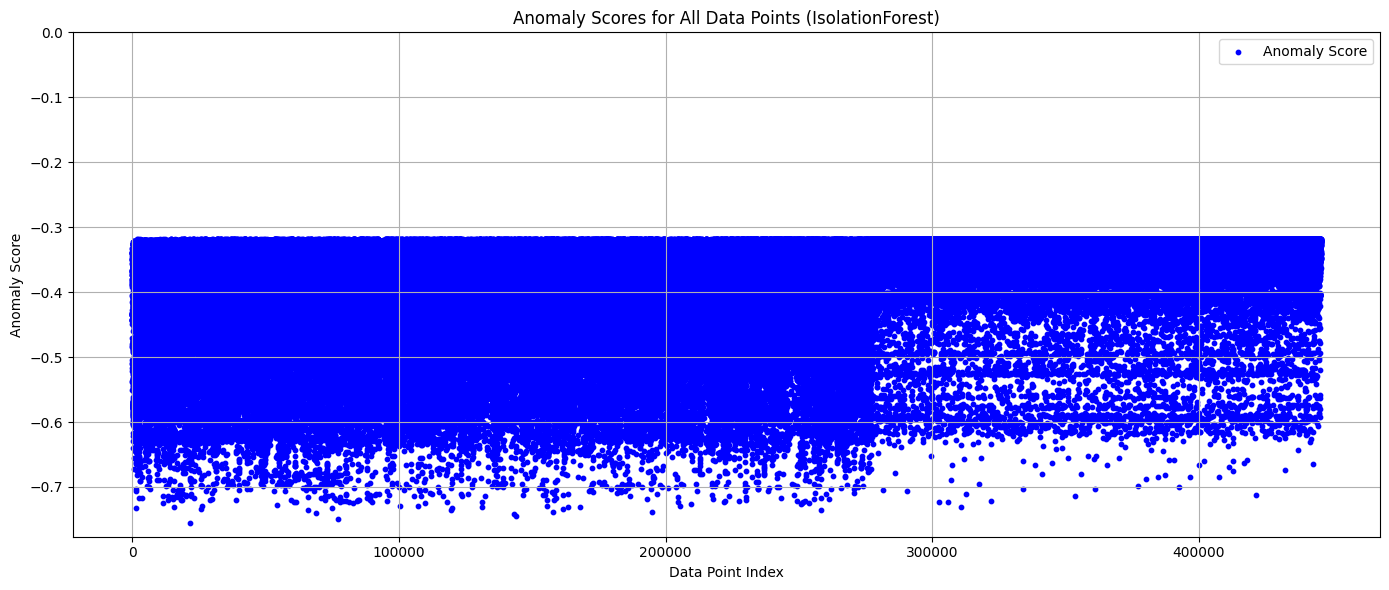

In [10]:
preds_2 = IF.predict(df_2_scaled)
scores_2 = IF.score_samples(df_2_scaled)

df_2_scaled_result = pd.DataFrame()
df_2_scaled_result['prediction'] = preds_2
df_2_scaled_result['anomaly_score'] = scores_2


anomaly_2 = (df_2_scaled_result["prediction"] == -1).sum()
normal_2 = (df_2_scaled_result["prediction"] == 1).sum()

print("\n" , f"Detection distribution anomaly/normal: {anomaly_2 / len(df_2_scaled_result) * 100:.4f}% / {normal_2 / len(df_2_scaled_result) * 100:.4f}%")
print("!!! Wyniki pokazuje dopasowanie contamination (wyciagania wnioskow z gotowego produktu pracy modelu) NIE DCHYLENIA NORMALNY/ANOMALYJNY ruch sieciowy !!!")
print("Anomaly detected: ",anomaly_2)
print("Normal traffic: ",normal_2)

plt.figure(figsize=(14, 6))  # szeroki wykres

plt.scatter(df_2_scaled_result.index, df_2_scaled_result['anomaly_score'], color='blue', label='Anomaly Score', s=10)

plt.title('Anomaly Scores for All Data Points (IsolationForest)')
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(top=0)
plt.show()

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.4s finished


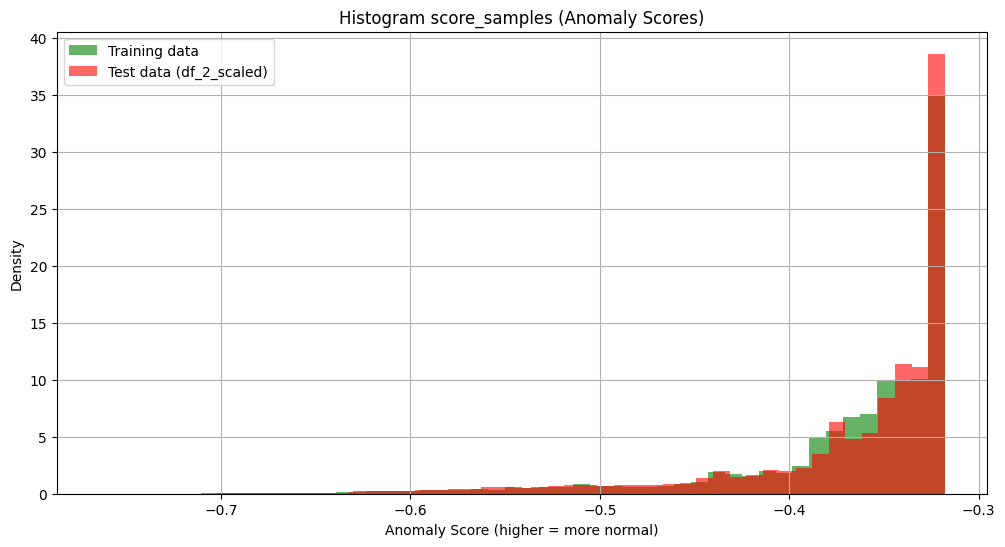

In [11]:
scores_train = IF.score_samples(df_scaled)

# score_samples dla danych testowych (z anomaliami)
scores_test = scores_2

plt.figure(figsize=(12,6))

# Histogram dla danych treningowych
plt.hist(scores_train, bins=50, alpha=0.6, label='Training data', color='green', density=True)

# Histogram dla danych testowych
plt.hist(scores_test, bins=50, alpha=0.6, label='Test data (df_2_scaled)', color='red', density=True)

plt.title('Histogram score_samples (Anomaly Scores)')
plt.xlabel('Anomaly Score (higher = more normal)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>2.3 Sprawdzenie dokładniści wytrenowanego modelu na Tuesday-workingHours</div>
</div>

In [12]:
df_2_scaled_result_check = pd.concat([df_2_scaled,df_2_scaled_result, df_2_labels], axis=1)
#print(len(df_2_scaled_result),len(df_2_labels),len(df_2_scaled_result_check))
# print(df_2_scaled_result.index)
# print(df_2_labels.index)
# print(df_2_scaled_result_check.head)
print("Number of flows in Tuesday - Working Hours: ", len(df_2_scaled_result_check))
print("\n")
df_2_real_anomaly_count = (df_2_scaled_result_check["Label"] != "BENIGN").sum()
print("Correct data: ")
print("Real number of anomalies in Tuesday - Working Hours:", df_2_real_anomaly_count)
print(f"Procentage of anomlys in dataset: {df_2_real_anomaly_count / len(df_2_scaled_result_check) * 100:.4f}%")

df_2_predicted_anomaly_count = (df_2_scaled_result_check["prediction"] == -1).sum()
print("\n")
print("Predicted data: ")
print("Number of DETECTED anomalies in Tuesday - Working Hours: ", df_2_predicted_anomaly_count)
print(f"Procentage of anomlys in dataset: {df_2_predicted_anomaly_count / len(df_2_scaled_result_check) * 100:.4f}%")

TP = ((df_2_scaled_result_check["Label"] != "BENIGN") & (df_2_scaled_result_check["prediction"] == -1)).sum()
FP = df_2_predicted_anomaly_count - TP
FN = df_2_real_anomaly_count - TP
TN = len(df_2_scaled_result_check) - TP - FP - FN

print("\nNumber of correct predictions:", TP)
print(f"Accuracy of predictions: {((TP + TN) / len(df_2_scaled_result_check)) * 100:.4f}%")
print(f"Sensitivity of predictions: {(TP / df_2_real_anomaly_count) * 100:.4f}%")
print(f"Precision of predictions: {(TP / df_2_predicted_anomaly_count) * 100:.4f}%")

print("TP: ",TP)
print("FP: ",FP)
print("TN: ",TN)
print("FN: ",FN)

# pd.set_option('display.max_rows', 200)
# print(df_2_scaled_result_check[df_2_scaled_result_check["prediction"] == -1])
# pd.reset_option('display.max_rows')

Number of flows in Tuesday - Working Hours:  445645


Correct data: 
Real number of anomalies in Tuesday - Working Hours: 13832
Procentage of anomlys in dataset: 3.1038%


Predicted data: 
Number of DETECTED anomalies in Tuesday - Working Hours:  4198
Procentage of anomlys in dataset: 0.9420%

Number of correct predictions: 0
Accuracy of predictions: 95.9542%
Sensitivity of predictions: 0.0000%
Precision of predictions: 0.0000%
TP:  0
FP:  4198
TN:  427615
FN:  13832


<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>3.1 Wizualizacja efektu testu na danych Wednesday-WorkingHours - Tylko ataki</div>
</div>

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished



 Detection distribution anomaly/normal: 56.0175% / 43.9825%
!!! Wyniki pokazuje dopasowanie contamination (wyciagancia wnioskow z gotowego produktu pracy modelu) NIE DCHYLENIA NORMALNY/ANOMALYJNY ruch sieciowy !!!
Anomaly detected:  141009
Normal traffic:  110714


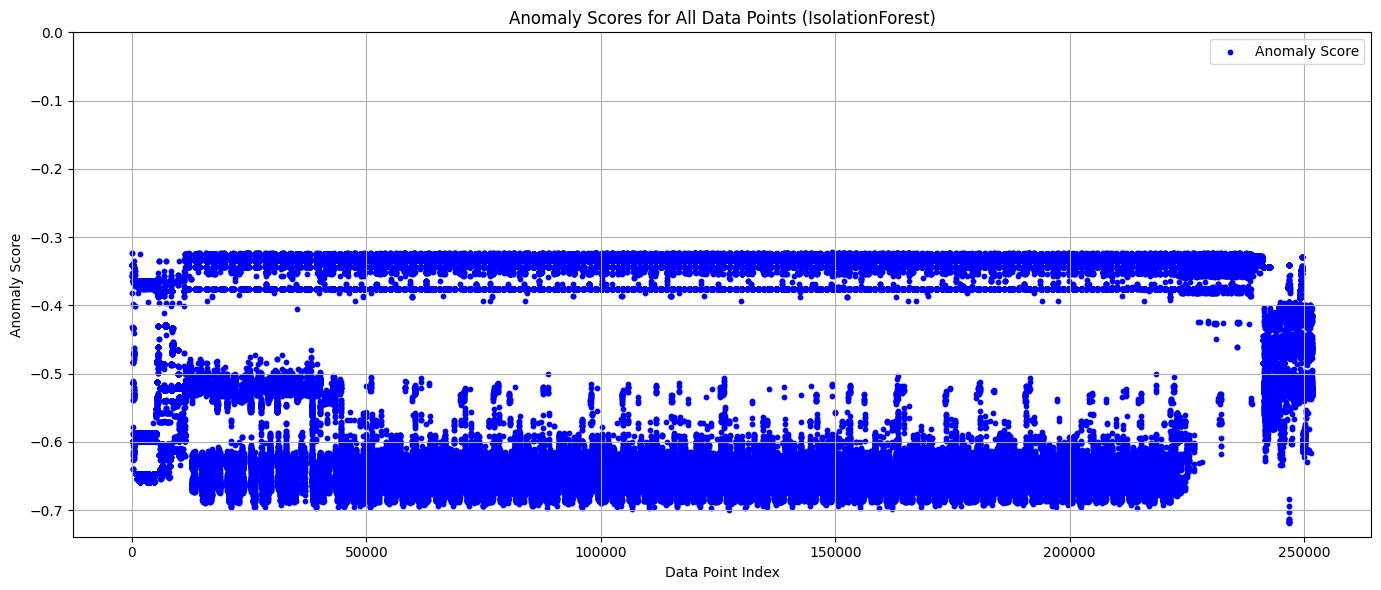

In [13]:
preds_3_5 = IF.predict(df_3_5_scaled)
scores_3_5 = IF.score_samples(df_3_5_scaled)

df_3_5_scaled_result = pd.DataFrame()
df_3_5_scaled_result['prediction'] = preds_3_5
df_3_5_scaled_result['anomaly_score'] = scores_3_5


anomaly_3_5 = (df_3_5_scaled_result["prediction"] == -1).sum()
normal_3_5 = (df_3_5_scaled_result["prediction"] == 1).sum()

print("\n" , f"Detection distribution anomaly/normal: {anomaly_3_5 / len(df_3_5_scaled_result) * 100:.4f}% / {normal_3_5 / len(df_3_5_scaled_result) * 100:.4f}%")
print("!!! Wyniki pokazuje dopasowanie contamination (wyciagancia wnioskow z gotowego produktu pracy modelu) NIE DCHYLENIA NORMALNY/ANOMALYJNY ruch sieciowy !!!")
print("Anomaly detected: ",anomaly_3_5)
print("Normal traffic: ",normal_3_5)
plt.figure(figsize=(14, 6))

plt.scatter(df_3_5_scaled_result.index, df_3_5_scaled_result['anomaly_score'], color='blue', label='Anomaly Score', s=10)

plt.title('Anomaly Scores for All Data Points (IsolationForest)')
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(top=0)
plt.show()


<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>3.2 Wizualizacja efektu testu na danych Wednesday-WorkingHours</div>
</div>

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.1s finished



 Detection distribution anomaly/normal: 21.5449% / 78.4551%
!!! Wyniki pokazuje dopasowanie contamination (wyciagania wnioskow z gotowego produktu pracy modelu) NIE DCHYLENIA NORMALNY/ANOMALYJNY ruch sieciowy !!!
Anomaly detected:  148963
Normal traffic:  542443


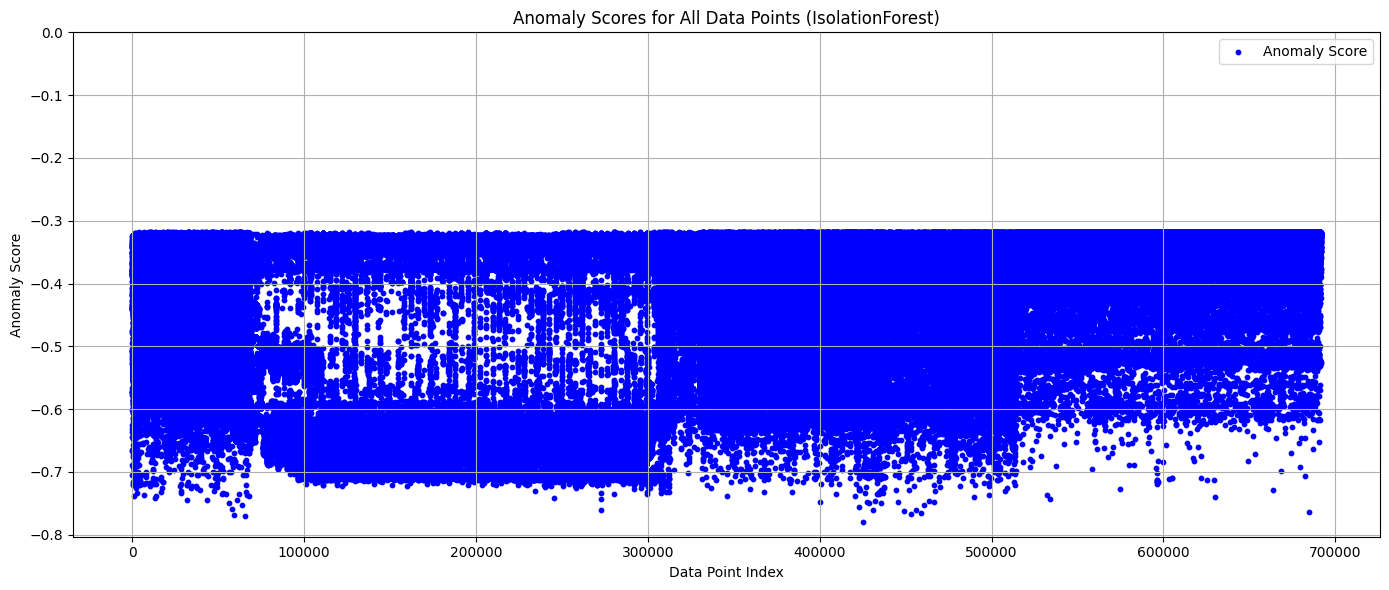

In [14]:
preds_3 = IF.predict(df_3_scaled)
scores_3 = IF.score_samples(df_3_scaled)

df_3_scaled_result = pd.DataFrame()
df_3_scaled_result['prediction'] = preds_3
df_3_scaled_result['anomaly_score'] = scores_3


anomaly_3 = (df_3_scaled_result["prediction"] == -1).sum()
normal_3 = (df_3_scaled_result["prediction"] == 1).sum()

print("\n" , f"Detection distribution anomaly/normal: {anomaly_3 / len(df_3_scaled_result) * 100:.4f}% / {normal_3 / len(df_3_scaled_result) * 100:.4f}%")
print("!!! Wyniki pokazuje dopasowanie contamination (wyciagania wnioskow z gotowego produktu pracy modelu) NIE DCHYLENIA NORMALNY/ANOMALYJNY ruch sieciowy !!!")
print("Anomaly detected: ",anomaly_3)
print("Normal traffic: ",normal_3)

plt.figure(figsize=(14, 6))  # szeroki wykres

plt.scatter(df_3_scaled_result.index, df_3_scaled_result['anomaly_score'], color='blue', label='Anomaly Score', s=10)

plt.title('Anomaly Scores for All Data Points (IsolationForest)')
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(top=0)
plt.show()

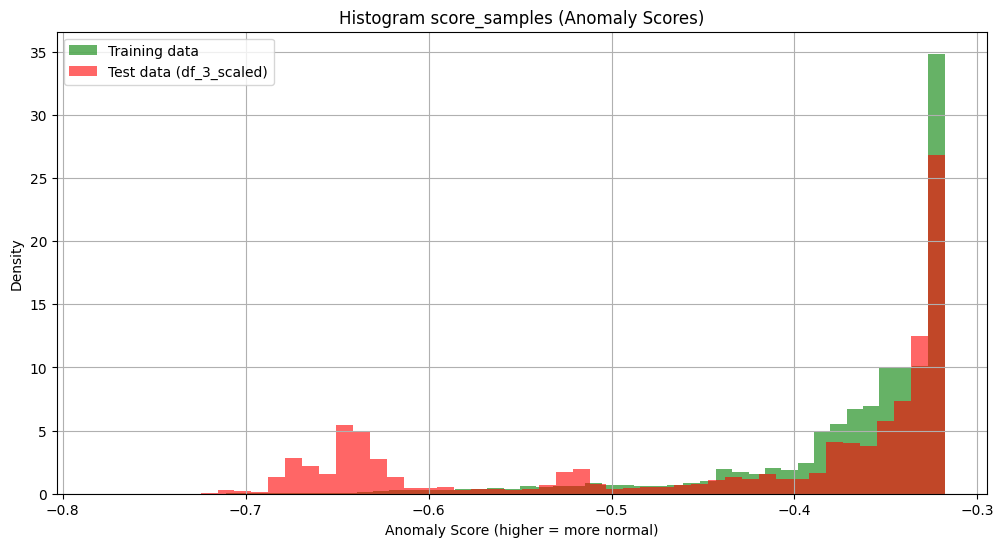

In [15]:
# score_samples dla danych testowych (z anomaliami)
scores_test = scores_3

plt.figure(figsize=(12,6))

# Histogram dla danych treningowych
plt.hist(scores_train, bins=50, alpha=0.6, label='Training data', color='green', density=True)

# Histogram dla danych testowych
plt.hist(scores_test, bins=50, alpha=0.6, label='Test data (df_3_scaled)', color='red', density=True)

plt.title('Histogram score_samples (Anomaly Scores)')
plt.xlabel('Anomaly Score (higher = more normal)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>3.3 Sprawdzenie dokładniści wytrenowanego modelu na Wednesday-WorkingHours</div>
</div>

In [16]:
df_3_scaled_result_check = pd.concat([df_3_scaled,df_3_scaled_result, df_3_labels], axis=1)

# print(len(df_3_scaled_result),len(df_3_labels),len(df_3_scaled_result_check))
# print(df_3_scaled_result.index)
# print(df_3_scaled.index)
# print(df_3_labels.index)
# print(df_3_scaled_result_check.isna().any(axis=0).sum(), len(df_unrecognized))
# print(df_3_labels.isna().any().sum(), len(df_unrecognized))
# print(df_3_scaled.isna().any(axis=0).sum(),len(df_filtered_result))
# print(df_3_scaled_result.isna().any(axis=0).sum(),len(df_filtered_labeled))

print("Number of flows in Wednesday - Working Hours: ", len(df_3_scaled_result_check))
print("\n")

df_3_real_anomaly_count = (df_3_scaled_result_check["Label"] != "BENIGN").sum()

print("Correct data: ")
print("Real number of anomalies in Wednesday - Working Hours:", df_3_real_anomaly_count)
print(f"Procentage of anomlys in dataset: {df_3_real_anomaly_count / len(df_3_scaled_result_check) * 100:.4f}%")

df_3_predicted_anomaly_count = (df_3_scaled_result_check["prediction"] == -1).sum()
print("\n")
print("Predicted data: ")
print("Number of DETECTED anomalies in Wednesday - Working Hours: ", df_3_predicted_anomaly_count)
print(f"Procentage of anomlys in dataset: {df_3_predicted_anomaly_count / len(df_3_scaled_result_check) * 100:.4f}%")


TP = ((df_3_scaled_result_check["Label"] != "BENIGN") & (df_3_scaled_result_check["prediction"] == -1)).sum()
FP = df_3_predicted_anomaly_count - TP
FN = df_3_real_anomaly_count - TP
TN = len(df_3_scaled_result_check) - TP - FP - FN

print("\nNumber of correct predictions:", TP)
print(f"Accuracy of predictions: {((TP + TN) / len(df_3_scaled_result_check)) * 100:.4f}%")
print(f"Sensitivity of predictions: {(TP / df_3_real_anomaly_count) * 100:.4f}%")
print(f"Precision of predictions: {(TP / df_3_predicted_anomaly_count) * 100:.4f}%")



# pd.set_option('display.max_rows', 200)
# print(df_3_scaled_result_check[df_3_scaled_result_check["prediction"] == -1])
# pd.reset_option('display.max_rows')

Number of flows in Wednesday - Working Hours:  691406


Correct data: 
Real number of anomalies in Wednesday - Working Hours: 251723
Procentage of anomlys in dataset: 36.4074%


Predicted data: 
Number of DETECTED anomalies in Wednesday - Working Hours:  148963
Procentage of anomlys in dataset: 21.5449%

Number of correct predictions: 141009
Accuracy of predictions: 82.8367%
Sensitivity of predictions: 56.0175%
Precision of predictions: 94.6604%


In [25]:
df_3_real_anomaly = df_3_scaled_result_check[df_3_scaled_result_check["Label"] != "BENIGN"]
df_3_real_anomaly = df_3_real_anomaly.reset_index(drop=True)
df_3_real_anomaly_no_label = df_3_real_anomaly.drop(["Label"], axis = 1)

preds_3_real = IF.predict(df_3_real_anomaly_no_label)
scores_3_real = IF.score_samples(df_3_real_anomaly_no_label)


df_3_real_anomaly['prediction'] = preds_3_real
df_3_real_anomaly['anomaly_score'] = scores_3_real

print((df_3_real_anomaly['prediction'] == 1).sum())



KeyError: 'Label'

<div style="text-align: center;color:#66ff7d; font-size: 50px; font-family: 'OCR A Extended', 'Lucida Console', 'Monaco', monospace; margin-top: 20px; line-height: 1.6;">
    DEBUGGING TESTS
</div>

In [19]:
# columns_to_plot = df_2_scaled.columns[:4]  # wybieramy np. 4 pierwsze kolumny do porównania

# fig, axes = plt.subplots(2, len(columns_to_plot), figsize=(5 * len(columns_to_plot), 8))
# fig.suptitle("Porównanie df_2_scaled (góra) vs df_2_5_scaled (dół)", fontsize=16)

# for i, col in enumerate(columns_to_plot):
#     # Wykres df_2_scaled
#     axes[0, i].plot(df_2_scaled[col].values, color='blue')
#     axes[0, i].set_title(f"df_2_scaled - {col}", fontsize=10)

#     # Wykres df_2_5_scaled
#     axes[1, i].plot(df_2_5_scaled[col].values, color='orange')
#     axes[1, i].set_title(f"df_2_5_scaled - {col}", fontsize=10)

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

In [20]:
preds_4 = IF.predict(df_3_5_scaled.iloc[0:2])
print(preds_4)

[1 1]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
